In [1]:
#Alper Mumcular
#21902740
#CS464 - HW2

#Libraries used
import numpy as np
from PIL import Image
import os

np.random.seed(1) # used for to get same answers for each run

In [2]:
# Path of your cat image directory, please update this accordingly!
your_path = "./cat_org/"  

In [3]:
noFlatten = list()
flatten = list()

In [4]:
#Q1 - Preprocessing
# Opens and keeps images in numpy array
file_path = your_path
for file in os.listdir(file_path):
    image_location = file_path + file
    # resize the images to 64 × 64 pixels by using the bilinear interpolation method - Reference 3 in homework file
    img = Image.open(mode="r", fp=image_location).resize((64,64), Image.BILINEAR)
    noFlatten.append(np.asarray(img, dtype=int)) # uint to int -- homework file

#flatten all images of size 64 × 64 × 3 to obtain a 4096 × 3 matrix for each image
flatten = np.array(noFlatten).reshape(5653,4096,3)
X = np.array(flatten)

# Given in homework file
X1=X[:,:,0]
X2=X[:,:,1]
X3=X[:,:,2]

In [5]:
X1

array([[  2,   2,   2, ...,   0,   0,   0],
       [184, 199, 203, ...,  50,  51,  53],
       [223, 222, 217, ...,  56,  55,  56],
       ...,
       [131, 130, 134, ...,  35,  47,  58],
       [132, 130, 125, ..., 234, 247, 252],
       [ 20,  21,  22, ..., 109, 125, 128]])

In [6]:
#Q1.1 - PCA
# Calculating mean of each channel - Slicing Xi = X[:, :, i] 1=Red 2=Green 3=Blue
mean_X1 = np.mean(X1,axis=0)
mean_X2 = np.mean(X2,axis=0)
mean_X3 = np.mean(X3,axis=0)

mean_X1

array([124.63612241, 124.63435344, 124.77887847, ..., 123.43587476,
       122.43003715, 121.60781886])

In [7]:
# Substraction of mean
X1 = X1 - mean_X1
X2 = X2 - mean_X2
X3 = X3 - mean_X3

In [8]:
# Calculation eigenvalues and eigenvectors of each channel (Given in homework file)
eigvals_X1, eigvecs_X1 = np.linalg.eig( 1.0 * np.dot(X1.T, X1) / 5653 )
eigvecs_X1 = eigvecs_X1.T

eigvals_X2, eigvecs_X2 = np.linalg.eig( 1.0 * np.dot(X2.T, X2) / 5653 )
eigvecs_X2 = eigvecs_X2.T

eigvals_X3, eigvecs_X3 = np.linalg.eig( 1.0 * np.dot(X3.T, X3) / 5653 )
eigvecs_X3 = eigvecs_X3.T

In [12]:
eigvals_X1

array([3.72691613e+06, 2.48140844e+06, 1.42773934e+06, ...,
       1.34296095e+00, 1.33888782e+00, 1.34211685e+00])

In [9]:
# Calculation proportion of variance explained (PVE)
pve_X1 = 0
pve_X2 = 0
pve_X3 = 0

for n in range(0,10):
    # Update pve in each run
    pc_X1 = eigvals_X1[n] / eigvals_X1.sum()
    pve_X1 = pve_X1 + pc_X1
    print("Red PVE   (" + str(n + 1) + ") = " + str(pc_X1) + "\t Cumulative Red PVE   ----> " + str(pve_X1) )
    
    pc_X2 = eigvals_X2[n] / eigvals_X2.sum()
    pve_X2 = pve_X2 + pc_X2
    print("Green PVE (" + str(n + 1) + ") = " + str(pc_X2) + "\t Cumulative Green PVE ----> " + str(pve_X2) )
    
    pc_X3 = eigvals_X3[n] / eigvals_X3.sum() 
    pve_X3 = pve_X3 + pc_X3
    print("Blue PVE  (" + str(n + 1) + ") = " + str(pc_X3) + "\t Cumulative Blue PVE  ----> " + str(pve_X3) )
    print("")

# Total PVE in 10 PCs
print("PVE sums for the first 10 PC")
print("Red   PVE = " + str(pve_X1) )
print("Green PVE = " + str(pve_X2) )
print("Blue  PVE = " + str(pve_X3) )
print("")

# Calculates the required components required to obtain at least %70 PVE
num_of_pca_X1 = 0
num_of_pca_X2 = 0
num_of_pca_X3 = 0

pve_X1 = 0
pve_X2 = 0
pve_X3 = 0


for n in range(len(eigvals_X1)):
    if(pve_X1 < 0.7):
        pc_X1 = eigvals_X1[n] / eigvals_X1.sum()
        pve_X1 = pve_X1 + pc_X1
        num_of_pca_X1 = n + 1
    else:
        break

print("the minimum number of principal components that are required to obtain at least 70% PVE for RED channel   = " + str(num_of_pca_X1))

for n in range(len(eigvals_X2)):
    if(pve_X2 < 0.7):
        pc_X2 = eigvals_X2[n] / eigvals_X2.sum()
        pve_X2 = pve_X2 + pc_X2
        num_of_pca_X2 = n + 1
    else:
        break
        
print("the minimum number of principal components that are required to obtain at least 70% PVE for GREEN channel = " + str(num_of_pca_X2))

        
for n in range(len(eigvals_X3)):
    if(pve_X3 < 0.7):
        pc_X3 = eigvals_X3[n] / eigvals_X3.sum()
        pve_X3 = pve_X3 + pc_X3
        num_of_pca_X3 = n + 1
    else:
        break
        
print("the minimum number of principal components that are required to obtain at least 70% PVE for BLUE channel  = " + str(num_of_pca_X3))


Red PVE   (1) = 0.2350696993627993	 Cumulative Red PVE   ----> 0.2350696993627993
Green PVE (1) = 0.20873714854025432	 Cumulative Green PVE ----> 0.20873714854025432
Blue PVE  (1) = 0.22859035906545536	 Cumulative Blue PVE  ----> 0.22859035906545536

Red PVE   (2) = 0.1565111520673864	 Cumulative Red PVE   ----> 0.39158085143018573
Green PVE (2) = 0.15884565962402095	 Cumulative Green PVE ----> 0.36758280816427524
Blue PVE  (2) = 0.15649257925344162	 Cumulative Blue PVE  ----> 0.38508293831889695

Red PVE   (3) = 0.09005253857044315	 Cumulative Red PVE   ----> 0.4816333900006289
Green PVE (3) = 0.09258856862586815	 Cumulative Green PVE ----> 0.4601713767901434
Blue PVE  (3) = 0.08790595575693261	 Cumulative Blue PVE  ----> 0.47298889407582956

Red PVE   (4) = 0.06829954682854636	 Cumulative Red PVE   ----> 0.5499329368291752
Green PVE (4) = 0.06811111746109606	 Cumulative Green PVE ----> 0.5282824942512395
Blue PVE  (4) = 0.06203548174652188	 Cumulative Blue PVE  ----> 0.53502437582235

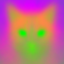

<DisplayHandle display_id=eigen_cat1>


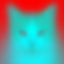

<DisplayHandle display_id=eigen_cat2>


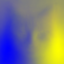

<DisplayHandle display_id=eigen_cat3>


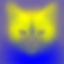

<DisplayHandle display_id=eigen_cat4>


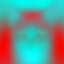

<DisplayHandle display_id=eigen_cat5>


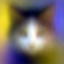

<DisplayHandle display_id=eigen_cat6>


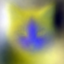

<DisplayHandle display_id=eigen_cat7>


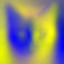

<DisplayHandle display_id=eigen_cat8>


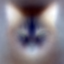

<DisplayHandle display_id=eigen_cat9>


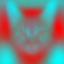

<DisplayHandle display_id=eigen_cat10>


In [10]:
#Q1.2 - Reshape
eigvecs_X1_reshaped = list()
#reshape each principal component to a 64 × 64 matrix.
eigvecs_X1_tmp = eigvecs_X1[0:10,:].reshape(10,64,64)
for n in range(0,10):
    #normalize the values of each of them between 0 and 1 using the min-max scaling method
    eigvecs_X1_reshaped.append( ( eigvecs_X1_tmp[n] - eigvecs_X1_tmp[n].min() ) / ( eigvecs_X1_tmp[n].max() - eigvecs_X1_tmp[n].min() ) )
eigvecs_X1_reshaped = 255 * np.array(eigvecs_X1_reshaped)

eigvecs_X2_reshaped = list()
#reshape each principal component to a 64 × 64 matrix.
eigvecs_X2_tmp = eigvecs_X2[0:10,:].reshape(10,64,64)
for n in range(0,10):
    #normalize the values of each of them between 0 and 1 using the min-max scaling method
    eigvecs_X2_reshaped.append( ( eigvecs_X2_tmp[n] - eigvecs_X2_tmp[n].min() ) / ( eigvecs_X2_tmp[n].max() - eigvecs_X2_tmp[n].min() ) )
eigvecs_X2_reshaped = 255 * np.array(eigvecs_X2_reshaped)

eigvecs_X3_reshaped = list()
#reshape each principal component to a 64 × 64 matrix.
eigvecs_X3_tmp = eigvecs_X3[0:10,:].reshape(10,64,64)
for n in range(0,10):
    #normalize the values of each of them between 0 and 1 using the min-max scaling method
    eigvecs_X3_reshaped.append( ( eigvecs_X3_tmp[n] - eigvecs_X3_tmp[n].min() ) / ( eigvecs_X3_tmp[n].max() - eigvecs_X3_tmp[n].min() ) )
eigvecs_X3_reshaped = 255 * np.array(eigvecs_X3_reshaped)


for i in range(0, 10):
    tmp = [eigvecs_X1_reshaped[i],eigvecs_X2_reshaped[i],eigvecs_X3_reshaped[i]]
    arrays = np.array(tmp, dtype = np.uint8)
    #stack corresponding color channels (R, G, and B) -- homework file
    img = np.stack(arrays, axis = 2)
    
    eigencat = (Image.fromarray(img))
    # If you are not using Jupyter, below line may not work. Please comment that line.
    print(display(eigencat, display_id="eigen_cat" + str(i + 1))) # Couldn't find the title, so I used display_id
    eigencat.save('eigen_cat{}.jpg'.format(i + 1))
    

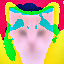

<DisplayHandle display_id=reconstruction_1>


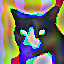

<DisplayHandle display_id=reconstruction_50>


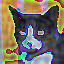

<DisplayHandle display_id=reconstruction_250>


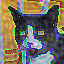

<DisplayHandle display_id=reconstruction_500>


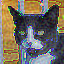

<DisplayHandle display_id=reconstruction_1000>


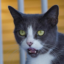

<DisplayHandle display_id=reconstruction_4096>


In [11]:
#Q1.3 - Reconstruction
k = list([1, 50, 250, 500, 1000, 4096])
mean_X1_reshaped = mean_X1.reshape(64, 64)
mean_X2_reshaped = mean_X2.reshape(64, 64)
mean_X3_reshaped = mean_X3.reshape(64, 64)

for k_val in k:
    img = np.zeros((64,64,3))
    
    tmp = np.array(Image.open(mode="r", fp= your_path + "flickr_cat_000003.jpg").resize((64,64), Image.BILINEAR))

    tmp[:,:,0] = tmp[:,:,0] - mean_X1_reshaped
    tmp[:,:,1] = tmp[:,:,1] - mean_X2_reshaped
    tmp[:,:,2] = tmp[:,:,2] - mean_X3_reshaped
    
    flattened = np.concatenate((tmp[:,:,0].flatten(), tmp[:,:,1].flatten(), tmp[:,:,2].flatten()), axis=0).reshape(3,4096)
    
    # calculate the dot product with principle components and the image
    img[:,:,0] = sum( (np.dot(flattened[0], eigvecs_X1[i]) * eigvecs_X1[i]).reshape(64, 64) for i in range(0, k_val) )
    img[:,:,1] = sum( (np.dot(flattened[1], eigvecs_X2[i]) * eigvecs_X2[i]).reshape(64, 64) for i in range(0, k_val) )
    img[:,:,2] = sum( (np.dot(flattened[2], eigvecs_X3[i]) * eigvecs_X3[i]).reshape(64, 64) for i in range(0, k_val) )

    # Do not forget to add mean
    img[:,:,0] = img[:,:,0] + mean_X1_reshaped
    img[:,:,1] = img[:,:,1] + mean_X2_reshaped
    img[:,:,2] = img[:,:,2] + mean_X3_reshaped
    
    
    img_reconstructed = Image.fromarray( img.astype(np.uint8) )
    # If you are not using Jupyter, below line may not work. Please comment that line.
    print(display(img_reconstructed, display_id="reconstruction_" + str(k_val))) # Couldn't find the title, so I used display_id
    img_reconstructed.save('./reconstruction_{}.jpg'.format(k_val)) # change this path if needed